In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet
from sklearn.metrics import r2_score, mean_absolute_error

champagne = pd.read_csv("../contents/perrin-freres-monthly-champagne.csv")
champagne.dropna(inplace=True)
champagne = champagne.rename(columns={"Month": "ds", "Perrin Freres monthly champagne sales millions ?64-?72": "y", })
champagne["ds"] = pd.to_datetime(champagne["ds"])
champagne

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [23]:
train, test = train_test_split(champagne, test_size=0.2, shuffle=False)
model = Prophet(seasonality_mode="multiplicative")
model.fit(train)
prediction = model.predict(test)
print(r2_score(test["y"], prediction["yhat"]))
print(mean_absolute_error(test["y"], prediction["yhat"]))

16:20:50 - cmdstanpy - INFO - Chain [1] start processing
16:20:51 - cmdstanpy - INFO - Chain [1] done processing


0.9371059772857826
478.4104832879447


In [24]:
prediction.set_index("ds")["yhat_upper"]

ds
1971-01-01     5300.529928
1971-02-01     4951.310174
1971-03-01     4975.325808
1971-04-01     5605.912160
1971-05-01     5369.112229
1971-06-01     5831.508988
1971-07-01     5487.899158
1971-08-01     2860.586835
1971-09-01     6581.181617
1971-10-01     7527.508640
1971-11-01    11173.610495
1971-12-01    14188.517085
1972-01-01     5853.145363
1972-02-01     5375.385551
1972-03-01     6010.911268
1972-04-01     5616.704443
1972-05-01     6264.555944
1972-06-01     6080.118577
1972-07-01     4964.603145
1972-08-01     3061.123655
1972-09-01     6271.624262
Name: yhat_upper, dtype: float64

In [25]:
champagne.set_index("ds")["y"]

ds
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: y, Length: 105, dtype: float64

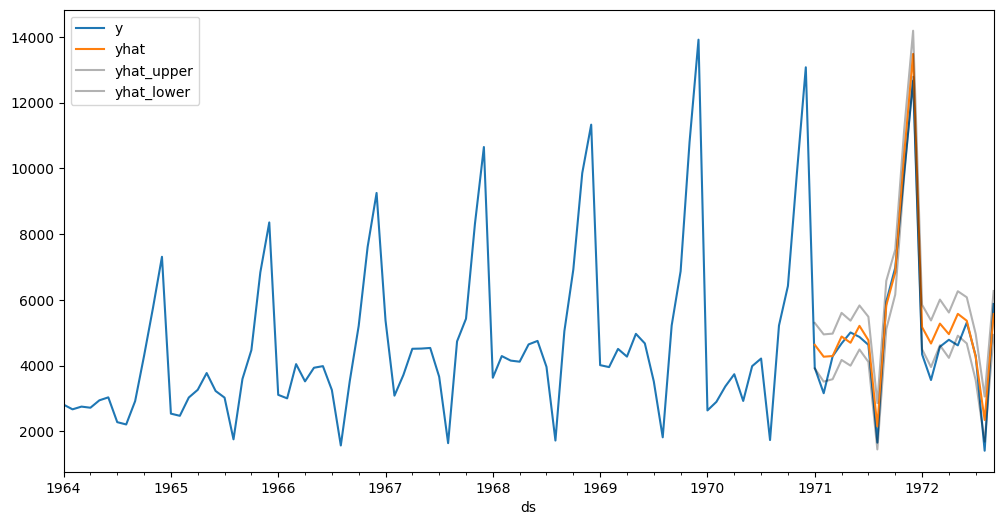

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
champagne.set_index("ds")["y"].plot(ax=ax)
prediction.set_index("ds")["yhat"].plot(ax=ax)
prediction.set_index("ds")["yhat_upper"].plot(ax=ax, color="k", alpha=0.3)
prediction.set_index("ds")["yhat_lower"].plot(ax=ax, color="k", alpha=0.3)

ax.legend()
plt.show()

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

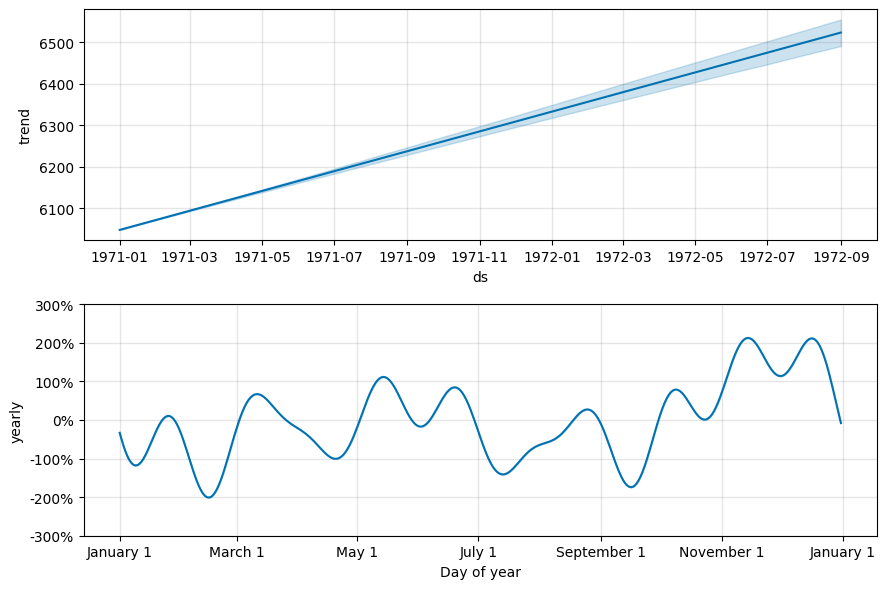

In [27]:
model.plot_components(model.predict(test))
plt.show()